In [2]:
import nltk
from nltk.tokenize import sent_tokenize # sentence tokenization
from nltk.tokenize import word_tokenize # work tokenization
from nltk.probability import FreqDist 
from nltk.corpus import stopwords # part of tokenization
from nltk.stem.wordnet import WordNetLemmatizer # lemmatization
from nltk.stem.porter import PorterStemmer # stemming

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nltk.tokenize import RegexpTokenizer # bag of words
from sklearn.feature_extraction.text import CountVectorizer # bag of words

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
text="Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.The sky is pinkish-blue. You shouldn't eat cardboard"


# TOKENIZATION

In [4]:
sent_tokenized_text =sent_tokenize(text) # SENTENCE

In [5]:
print(sent_tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [6]:
word_tokenized_text=word_tokenize(text)

In [7]:
print(word_tokenized_text)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome.The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [8]:
freq_dist=FreqDist(word_tokenized_text)

In [9]:
freq_dist

FreqDist({'is': 3, ',': 2, 'Hello': 1, 'Mr.': 1, 'Smith': 1, 'how': 1, 'are': 1, 'you': 1, 'doing': 1, 'today': 1, ...})

In [10]:
freq_dist.most_common(2)

[('is', 3), (',', 2)]

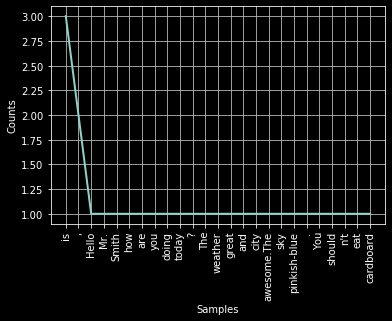

In [11]:
freq_dist.plot(30,cumulative=False)
# plt.plot()

# Filtering 

In [12]:
stop_word=set(stopwords.words('english'))

In [13]:
print(stop_word)

{'did', 'to', 'their', 'own', 'now', 'shan', 'hadn', 'other', "needn't", 'or', 'didn', 'hasn', 'my', 'myself', 'them', 'being', 'when', 'but', 'against', 'here', 'shouldn', "couldn't", 'themselves', 'ourselves', 'an', 'these', 'its', 'y', 'is', "hasn't", "it's", 'into', 'just', "you'll", 'our', 'herself', 'about', "shan't", 'there', 'your', "that'll", 'll', "weren't", 'it', 'before', 'yours', 'o', 're', 'for', 'only', 'couldn', 'how', 'won', 'up', 'until', 'has', 'and', 'be', 'have', 'than', "she's", 'whom', 'me', 'why', 'above', 'd', 'm', 'again', 'haven', 'been', 'further', 'do', 'nor', 'we', "don't", 'they', 'am', 'who', 'were', "shouldn't", 'he', 'by', 'isn', 'needn', "isn't", 'doing', 'weren', 's', 'with', "hadn't", 'ma', 'his', 'mustn', "you're", 'yourself', 'can', 'theirs', "won't", "haven't", "wouldn't", 'ain', 'i', 'this', 'mightn', 'from', 'any', "doesn't", 'on', 'off', 'under', 'some', 'then', "mightn't", "you'd", 'don', 'both', 'doesn', 't', 'what', 'itself', "wasn't", 'of'

In [14]:
filtered_sent=[]
for w in word_tokenized_text:
    if w not in stop_word:
        filtered_sent.append(w)

In [15]:
print(word_tokenized_text)
print(filtered_sent)


['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome.The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome.The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


# Stemming

In [16]:
port_stem=PorterStemmer()

In [17]:
stem_sent=[]
for w in filtered_sent:
    stem_sent.append(port_stem.stem(w))

In [18]:
print(filtered_sent)
print(stem_sent)

['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome.The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesome.th', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


# Lemmatization

In [19]:
lemma=WordNetLemmatizer()

In [20]:
# print(lemma.lemmatize("rocks"))

rock


In [21]:
lemma_sent=[]
# temp_lemma_sent=[]

for w in stem_sent:
    lemma_sent.append(lemma.lemmatize(w))

In [22]:
print(lemma_sent)
print(stem_sent)

['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesome.th', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']
['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesome.th', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


# POS tagging:

In [23]:
nltk.pos_tag(word_tokenized_text)

[('Hello', 'NNP'),
 ('Mr.', 'NNP'),
 ('Smith', 'NNP'),
 (',', ','),
 ('how', 'WRB'),
 ('are', 'VBP'),
 ('you', 'PRP'),
 ('doing', 'VBG'),
 ('today', 'NN'),
 ('?', '.'),
 ('The', 'DT'),
 ('weather', 'NN'),
 ('is', 'VBZ'),
 ('great', 'JJ'),
 (',', ','),
 ('and', 'CC'),
 ('city', 'NN'),
 ('is', 'VBZ'),
 ('awesome.The', 'JJ'),
 ('sky', 'NN'),
 ('is', 'VBZ'),
 ('pinkish-blue', 'JJ'),
 ('.', '.'),
 ('You', 'PRP'),
 ('should', 'MD'),
 ("n't", 'RB'),
 ('eat', 'VB'),
 ('cardboard', 'NN')]

# EDA:


In [24]:
data=pd.read_csv('train.tsv',sep='\t')

In [25]:
data.head(7)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [27]:
data.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [28]:
data.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [29]:
senti_count=data.groupby('Sentiment').count() # group by sql return a mini table

In [30]:
senti_count

,PhraseId,SentenceId,Phrase
Sentiment,,,
0,7072,7072,7072
1,27273,27273,27273
2,79582,79582,79582
3,32927,32927,32927
4,9206,9206,9206


[]

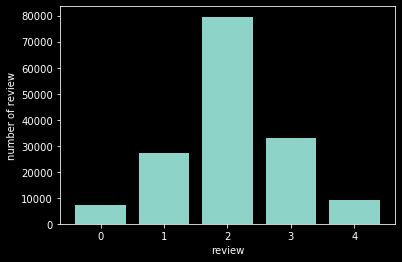

In [31]:
plt.bar(senti_count.index.values,senti_count['Phrase'])
plt.xlabel('review')
plt.ylabel('number of review')
plt.plot()

# Bag of words:

In [32]:
reg_ex_token=RegexpTokenizer(r'[a-zA-Z0-9]+')
count_vectorizer=CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1),tokenizer=reg_ex_token.tokenize()
                            

In [33]:
# main function or module has its first letter as capital and its methods and attributes has _ as its seperator and lower case

In [34]:
cv_text=count_vectorizer.fit_transform(data['Phrase'])

# Classification :

In [35]:
tf_idf=TfidfVectorizer()

In [36]:
tfidf_text=tf_idf.fit_transform(data['Phrase'])

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(tfidf_text,data['Sentiment'],test_size=0.2,random_state=123)


# NB:

In [38]:
multi_nb=MultinomialNB()
multi_nb.fit(xtrain,ytrain)
ypred=multi_nb.predict(xtest)

In [39]:
print('Accuracy :',metrics.accuracy_score(ytest,ypred))

Accuracy : 0.5906061771113674


# Random Forest:

In [40]:
# rf=RandomForestClassifier(n_estimators=3,bootstrap = True,) 

In [41]:
# rf.fit(xtrain,ytrain)
# ypred=rf.predict(xtest)

In [42]:
# print('Accuracy :',metrics.accuracy_score(ytest,ypred))

# SVM:

In [43]:
# svm = SVC(kernel='linear') # try this with rbf kernel
# svm.fit(xtrain,ytrain)


In [44]:
# ypred=multi_nb.predict(xtest)

In [45]:
# print('Accuracy :',metrics.accuracy_score(ytest,ypred))